In [22]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
df = pd.read_csv('data_1.5_merged.csv', low_memory = False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
test = df[(df['Year'] == 2016)]
test = test[(test['Name'] == 11)]
set3 = test[(test['Stage'] == 1)].sort_values("Sprint_current_season", ascending = False)[:1]
set3['Rnk'] = sum(set3['Rnk'])
set3 = set3[:1]
set3

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rnk,GC,Rider,Age,Team,Name,Stage,Date,Avg. speed winner,ProfileScore,Distance,RaceRanking,Sprint_pts,Climb_pts,Oneday_pts,GC_pts,Sprint_cumsum,Climb_cumsum,Oneday_cumsum,GC_cumsum,Year,Month,Day,Sprint_current_season,Sprint_2011_sum,Climb_2011_sum,Oneday_2011_sum,GC_2011_sum,Sprint_2012_sum,Climb_2012_sum,Oneday_2012_sum,GC_2012_sum,Sprint_2013_sum,Climb_2013_sum,Oneday_2013_sum,GC_2013_sum,Sprint_2014_sum,Climb_2014_sum,Oneday_2014_sum,GC_2014_sum,Sprint_2015_sum,Climb_2015_sum,Oneday_2015_sum,GC_2015_sum,Sprint_2016_sum,Climb_2016_sum,Oneday_2016_sum,GC_2016_sum,Sprint_2017_sum,Climb_2017_sum,Oneday_2017_sum,GC_2017_sum,Sprint_2018_sum,Climb_2018_sum,Oneday_2018_sum,GC_2018_sum,Sprint_2019_sum,Climb_2019_sum,Oneday_2019_sum,GC_2019_sum,Sprint_2020_sum,Climb_2020_sum,Oneday_2020_sum,GC_2020_sum,Climb_current_season,Oneday_current_season,GC_current_season
134017,134017,1102,43041,0,30.0,199,28.0,58,11,1,2016-03-07,43.35,0,195.0,9,30.0,0.0,0.0,0.0,806.0,0.0,213.0,265.0,2016,3,7,71.0,213.0,0.0,5.0,195.0,313.0,0.0,0.0,25.0,5.0,0.0,0.0,5.0,202.0,0.0,160.0,30.0,2.0,0.0,48.0,5.0,115.0,1.0,220.0,20.0,91.0,12.0,104.0,45.0,0.0,0.0,19.0,13.0,15.0,19.0,26.0,34.0,25.0,43.0,11.0,80.0,0.0,0.0,5.0


In [26]:
dates = []
predicted = []

In [27]:
# compute the % of the winner being in TOP3 being one with the highest amount of points in the current season
i = 0
for year in df.Year.unique():
    set1 = df[(df['Year'] == year)]
    print("Taking year "+str(year)+" .")
    for race in set1.Name.unique():
        set2 = set1[(set1['Name'] == race)]
        print("Taking race "+str(race)+" .")
        for stage in set2.Stage.unique():
            print("Taking stage "+str(stage)+" .")
        # now we have the data split into individual "days", need to sort the results according to the relevant metrix (sprint, oneday points etc.)
            if set2['Stage'].iloc[0] == 0: # oneday
                set3 = set2[(set2['Stage'] == stage)].sort_values("Oneday_current_season", ascending = False)[:1]
                set3['Rnk'] = sum(set3['Rnk'])
                set3 = set3[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            elif set2['Stage'].iloc[0] == -1: # GC:
                set3 = set2[(set2['Stage'] == stage)].sort_values("GC_current_season", ascending = False)[:1]
                set3['Rnk'] = sum(set3['Rnk'])
                set3 = set3[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            elif set2['ProfileScore'].iloc[0] >= 50: # Climb:
                set3 = set2[(set2['Stage'] == stage)].sort_values("GC_current_season", ascending = False)[:1]
                set3['Rnk'] = sum(set3['Rnk'])
                set3 = set3[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            else: # Sprint:
                set3 = set2[(set2['Stage'] == stage)].sort_values("Sprint_current_season", ascending = False)[:1]
                set3['Rnk'] = sum(set3['Rnk'])
                set3 = set3[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])


 race 1 .
Taking stage 1 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking stage 7 .
Taking race 20 .
Taking stage 0 .
Taking race 13 .
Taking stage 0 .
Taking race 3 .
Taking stage 0 .
Taking race 61 .
Taking stage 1 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking race 4 .
Taking stage 0 .
Taking race 14 .
Taking stage 0 .
Taking race 15 .
Taking stage 0 .
Taking race 16 .
Taking stage 0 .
Taking race 18 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking race 35 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage 7 .
Taking stage 8 .
Taking stage 9 .
Taking stage 10 .
Taking stage 11 .
Taking stage 12 .
Taking stage 13 .
Taking stage 14 .
Taking stage 15 .
Taking stage 16 .
Taking stage 17 .
Taking stage 18 .
Taking stage 19 .
Taking stage 20 .
Taking st

In [28]:
results = {'Date': dates,
        'Predicted': predicted
        }
results = pd.DataFrame(results)

In [32]:
sum(results['Predicted'])/len(results['Predicted'])

0.15681544028950542

In [10]:
results.to_csv('predicted_top3_as_the_one_with_the_most_points.csv')

In [2]:
import pandas as pd
results = pd.read_csv('predicted_winner_as_the_one_with_the_most_points.csv', low_memory = False)
test = results.copy()
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
GB=test.groupby([(test.Year),(test.Month)]).mean()
GB.head(25)
GB.to_csv('mean_predicted.csv')

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


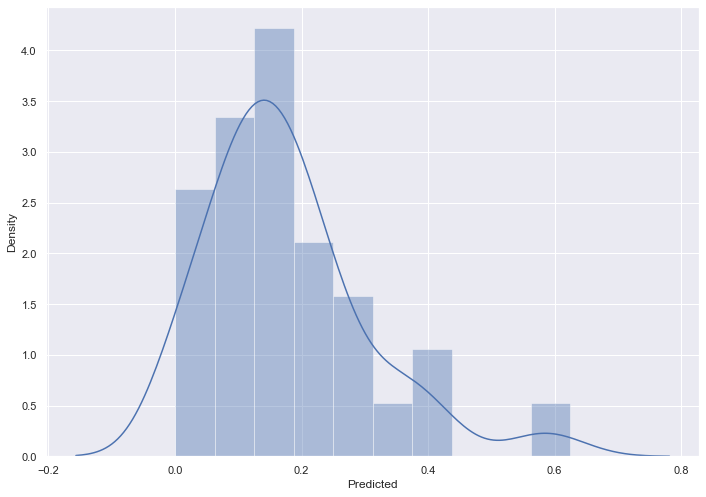

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(GB['Predicted'])
# we can see that most of the time, this approach is not great.
plt.savefig('./graphs/fig1.1.png')

In [13]:
GB1=GB.reset_index()
GB1 = GB1[GB1['Month'] > 2]
GB1 = GB1[GB1['Month'] < 10]
mean(GB1['Predicted'])

,Year,Month,Unnamed: 0,Predicted
1,2011,3,36.500000,0.090909
2,2011,4,66.500000,0.187500
3,2011,5,86.000000,0.086957
4,2011,6,106.000000,0.117647
5,2011,7,126.000000,0.173913
...,...,...,...,...
81,2019,8,1503.000000,0.240000
82,2019,9,1524.000000,0.176471
86,2020,3,1558.000000,0.142857
87,2020,8,1571.000000,0.210526


In [21]:
sum(GB1['Predicted'])/len(GB1['Predicted'])

0.14554032822874371

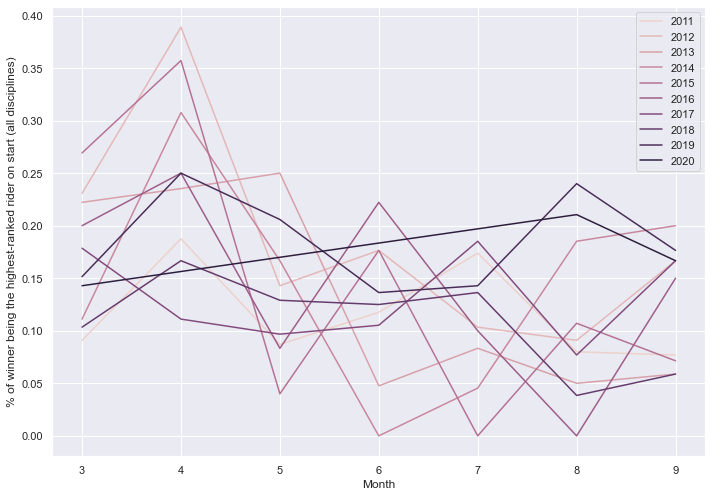

In [17]:
#GB.reset_index()
ax = sns.lineplot(x='Month',y='Predicted',hue='Year',data=GB1)
ax.set(ylabel = "% of winner being the highest-ranked rider on start (all disciplines)")
plt.legend(labels=['2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020'])
plt.savefig('./graphs/fig2.1.png')

In [16]:
GB['Index'] = 0
for i in range(len(GB['Predicted'])):
    GB['Index'].iloc[i] = i

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


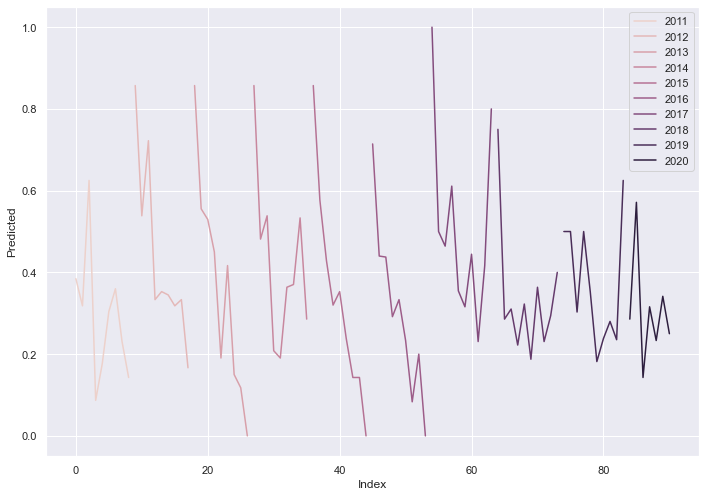

In [20]:
sns.lineplot(x='Index',y='Predicted',hue='Year',data=GB)
plt.legend(labels=['2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020'])
plt.savefig('./graphs/fig3.2.png')

In [18]:
GB.to_csv('pred_percentages_top3_mothly_indexed.csv')

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
GB

Unnamed: 0  Predicted  Index
Year Month                               
2011 1         6.000000   0.384615      0
     3        34.500000   0.318182      1
     4        64.500000   0.625000      2
     5        84.000000   0.086957      3
     6       104.000000   0.176471      4
     7       124.000000   0.304348      5
     8       148.440000   0.360000      6
     9       166.153846   0.230769      7
     10      177.000000   0.142857      8
2012 1       184.000000   0.857143      9
     3       200.500000   0.538462     10
     4       222.500000   0.722222     11
     5       242.000000   0.333333     12
     6       261.000000   0.352941     13
     7       284.000000   0.344828     14
     8       310.318182   0.318182     15
     9       325.000000   0.333333     16
     10      335.500000   0.166667     17
2013 1       342.000000   0.857143     18
     3       359.000000   0.555556     19
     4       381.000000   0.529412     20
     5       399.500000   0.450000     21
     6       420.000000   0.190476     22
     7       442.666667   0.416667     23
     8       465.000000   0.150000     24
     9       482.176471   0.117647     25
     10      495.000000   0.000000     26
2014 1       502.000000   0.857143     27
     3       519.000000   0.481481     28
     4       539.000000   0.538462     29
     5       557.500000   0.208333     30
     6       580.000000   0.190476     31
     7       601.500000   0.363636     32
     8       626.962963   0.370370     33
     9       645.266667   0.533333     34
     10      658.000000   0.285714     35
2015 1       665.000000   0.857143     36
     3       681.500000   0.576923     37
     4       701.500000   0.428571     38
     5       721.000000   0.320000     39
     6       742.000000   0.352941     40
     7       761.000000   0.238095     41
     8       785.928571   0.142857     42
     9       805.642857   0.142857     43
     10      814.000000   0.000000     44
2016 1       818.000000   0.714286     45
     3       834.000000   0.440000     46
     4       854.500000   0.437500     47
     5       874.500000   0.291667     48
     6       895.500000   0.333333     49
     7       919.500000   0.233333     50
     8       942.333333   0.083333     51
     9       955.400000   0.200000     52
     10      967.000000   0.000000     53
2017 1       971.500000   1.000000     54
     2       978.500000   0.500000     55
     3       995.500000   0.464286     56
     4      1018.500000   0.611111     57
     5      1043.000000   0.354839     58
     6      1068.000000   0.315789     59
     7      1091.185185   0.444444     60
     8      1118.076923   0.230769     61
     9      1134.833333   0.416667     62
     10     1150.000000   0.800000     63
2018 1      1161.500000   0.750000     64
     2      1169.000000   0.285714     65
     3      1187.000000   0.310345     66
     4      1210.500000   0.222222     67
     5      1235.000000   0.322581     68
     6      1258.500000   0.187500     69
     7      1277.500000   0.363636     70
     8      1302.076923   0.230769     71
     9      1322.117647   0.294118     72
     10     1339.000000   0.400000     73
2019 1      1350.500000   0.500000     74
     2      1356.500000   0.500000     75
     3      1375.000000   0.303030     76
     4      1401.500000   0.500000     77
     5      1429.205882   0.352941     78
     6      1455.409091   0.181818     79
     7      1478.000000   0.238095     80
     8      1501.000000   0.280000     81
     9      1522.000000   0.235294     82
     10     1534.500000   0.625000     83
2020 1      1542.000000   0.285714     84
     2      1549.000000   0.571429     85
     3      1556.000000   0.142857     86
     8      1569.000000   0.315789     87
     9      1593.633333   0.233333     88
     10     1629.097561   0.341463     89
     11     1652.500000   0.250000     90